<a href="https://colab.research.google.com/github/dhiya-09/dhiya/blob/main/dhiyaNM_docx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Testing file.csv to Testing file.csv


In [2]:
import pandas as pd
df = pd.read_csv('/content/sample_data/Testing file.csv')
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [ ]:
df.info()
df.describe()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [ ]:
print(df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64
Duplicates: 0


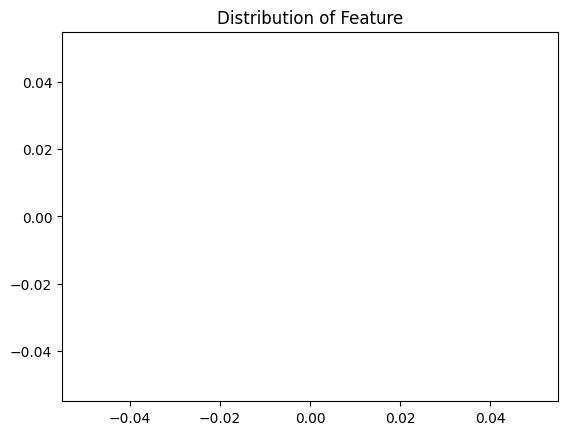

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df[df.duplicated], kde=True)
plt.title('Distribution of Feature')
plt.show()

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.select_dtypes(include='object').columns

Index(['prognosis'], dtype='object')

In [6]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split

# Assuming 'df_encoded' contains your features and 'target_variable_column' is your target column
X = df_encoded.drop('yellow_crust_ooze', axis=1)  # Replace 'target_variable_column' with the actual name
y = df_encoded['yellow_crust_ooze']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split data

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [16]:
# Define the new_input_dict with relevant values for your prediction
new_input_dict = {
    'crust_diameter': [10],  # Example value, replace with your desired input
    'topping_type': ['cheese'], # Example value, replace with your desired input
    # ... Add other features and their values
}

new_df = pd.DataFrame(new_input_dict)
new_df_encoded = pd.get_dummies(new_df)

In [22]:
!pip install gradio
import gradio as gr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 110.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.1 MB/s eta 0:00:00


In [20]:
def predict_disease(itching, skin_rash, nodal_skin_eruptions, continuous_sneezing,
                    shivering, chills, joint_pain, stomach_pain, acidity,
                    ulcers_on_tongue, muscle_wasting, vomiting, burning_micturition,
                    spotting_urination, fatigue, weight_gain, anxiety,
                    cold_hands_and_feets, mood_swings, weight_loss):

    input_dict = {
        'itching': [itching],
        'skin_rash': [skin_rash],
        'nodal_skin_eruptions': [nodal_skin_eruptions],
        'continuous_sneezing': [continuous_sneezing],
        'shivering': [shivering],
        'chills': [chills],
        'joint_pain': [joint_pain],
        'stomach_pain': [stomach_pain],
        'acidity': [acidity],
        'ulcers_on_tongue': [ulcers_on_tongue],
        'muscle_wasting': [muscle_wasting],
        'vomiting': [vomiting],
        'burning_micturition': [burning_micturition],
        'spotting_ urination': [spotting_urination],
        'fatigue': [fatigue],
        'weight_gain': [weight_gain],
        'anxiety': [anxiety],
        'cold_hands_and_feets': [cold_hands_and_feets],
        'mood_swings': [mood_swings],
        'weight_loss': [weight_loss]
    }

    input_df = pd.DataFrame(input_dict)
    input_df = input_df.clip(lower=0) # No negative values
    input_df = pd.get_dummies(input_df)
    input_df = input_df.reindex(columns=X_train.columns, fill_value=0)

    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)

    return str(prediction[0]) # Return disease name directly

In [23]:
interface = gr.Interface(
    fn=predict_disease,
    inputs=[
        gr.Number(label="itching"),
        gr.Number(label="skin_rash"),
        gr.Number(label="nodal_skin_eruptions"),
        gr.Number(label="continuous_sneezing"),
        gr.Number(label="shivering"),
        gr.Number(label="chills"),
        gr.Number(label="joint_pain"),
        gr.Number(label="stomach_pain"),
        gr.Number(label="acidity"),
        gr.Number(label="ulcers_on_tongue"),
        gr.Number(label="muscle_wasting"),
        gr.Number(label="vomiting"),
        gr.Number(label="burning_micturition"),
        gr.Number(label="spotting_ urination"),
        gr.Number(label="fatigue"),
        gr.Number(label="weight_gain"),
        gr.Number(label="anxiety"),
        gr.Number(label="cold_hands_and_feets"),
        gr.Number(label="mood_swings"),
        gr.Number(label="weight_loss")
    ],
    outputs="text",
    title="💊 Disease Predictor",
    description="Predicts disease based on symptoms"
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b9d0a74b31a28f1826.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
